<a href="https://colab.research.google.com/github/koseosmanturker/Human_Emotion_Detection/blob/main/emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import os
import tensorflow as tf
import keras
import cv2

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [24]:
from google.colab import files

# Upload the kaggle.json file
uploaded = files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!pip install kaggle

!kaggle datasets download -d msambare/fer2013

!unzip fer2013.zip

In [ ]:
train_path = "/content/train"
test_path = "/content/test"

In [ ]:
def preprocess_data(image_folder_path):
    images = []
    labels = []
    emotions = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
    for emotion_folder in os.listdir(image_folder_path):
        emotion_label = emotions[emotion_folder]
        for image_filename in os.listdir(os.path.join(image_folder_path, emotion_folder)):
            image_path = os.path.join(image_folder_path, emotion_folder, image_filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (64, 64))
            image = image / 255.0
            images.append(image)
            labels.append(emotion_label)
    return np.array(images), np.array(labels)

X1, Y1 = preprocess_data(train_path)
X2, Y2 = preprocess_data(test_path)

X = np.concatenate((X1, X2), axis=0)
Y = np.concatenate((Y1, Y2), axis=0)

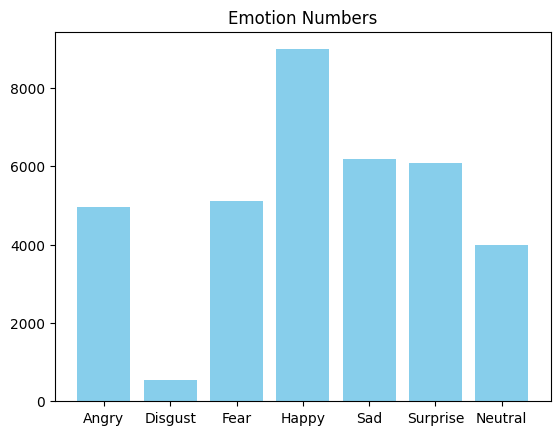

In [ ]:
Y_temp = np.array(Y)
number_of_angry = np.sum(Y_temp == 0)
number_of_disgust = np.sum(Y_temp == 1)
number_of_fear = np.sum(Y_temp == 2)
number_of_happy = np.sum(Y_temp == 3)
number_of_sad = np.sum(Y_temp == 4)
number_of_surprise = np.sum(Y_temp == 5)
number_of_neutral = np.sum(Y_temp == 6)

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
counts = [number_of_angry, number_of_disgust, number_of_fear, number_of_happy, number_of_sad, number_of_surprise, number_of_neutral]

plt.bar(emotions, counts, color='skyblue')

plt.title('Emotion Numbers')
plt.show()

In [ ]:
X_train = X[:28709]
Y_train = Y[:28709]
X_test = X[28709:32298]
Y_test = Y[28709:32298]
X_val = X[32298:]
Y_val = Y[32298:]
print("Length of X_train: ", len(X_train))
print("Length of X_test: ", len(X_test))
print("Length of X_val: ", len(X_val))

Length of X_train:  28709
Length of X_test:  3589
Length of X_val:  3589


In [ ]:
model = tf.keras.Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [ ]:
Y_train = to_categorical(Y_train, num_classes=7)
Y_val = to_categorical(Y_val, num_classes=7)
Y_test = to_categorical(Y_test, num_classes=7)

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
results = model.fit(X_train, Y_train, batch_size=64, epochs=30, validation_data = (X_val, Y_val))

Epoch 1/30
449/449 [==============================] - 11s 17ms/step - loss: 0.2307 - accuracy: 0.9169 - val_loss: 3.5781 - val_accuracy: 0.4815
Epoch 2/30
449/449 [==============================] - 7s 17ms/step - loss: 0.2198 - accuracy: 0.9189 - val_loss: 3.4898 - val_accuracy: 0.4876
Epoch 3/30
449/449 [==============================] - 7s 16ms/step - loss: 0.2252 - accuracy: 0.9162 - val_loss: 3.8793 - val_accuracy: 0.4798
Epoch 4/30
449/449 [==============================] - 7s 17ms/step - loss: 0.2138 - accuracy: 0.9213 - val_loss: 3.8579 - val_accuracy: 0.4817
Epoch 5/30
449/449 [==============================] - 8s 17ms/step - loss: 0.2217 - accuracy: 0.9186 - val_loss: 3.7463 - val_accuracy: 0.5052
Epoch 6/30
449/449 [==============================] - 7s 16ms/step - loss: 0.2113 - accuracy: 0.9237 - val_loss: 3.9548 - val_accuracy: 0.4751
Epoch 7/30
449/449 [==============================] - 7s 17ms/step - loss: 0.2135 - accuracy: 0.9224 - val_loss: 3.8185 - val_accuracy: 0.479

In [21]:
model.evaluate(X_test, Y_test)

113/113 [==============================] - 1s 5ms/step - loss: 3.0289 - accuracy: 0.6592


[3.0288827419281006, 0.6592365503311157]

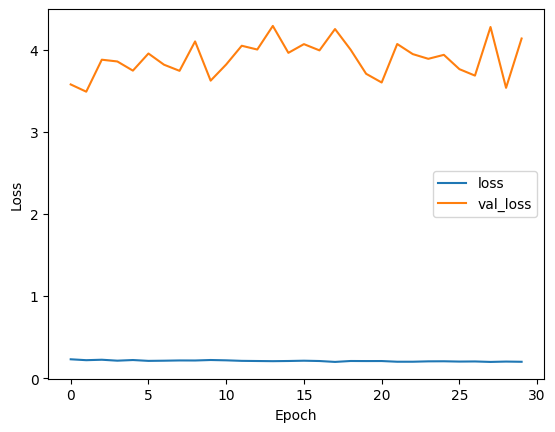

In [22]:
# Plot the the training loss
plt.plot(results.history["loss"], label = "loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label = "val_loss" )

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")
# Put legend table
plt.legend()

# Show the plot
plt.show()

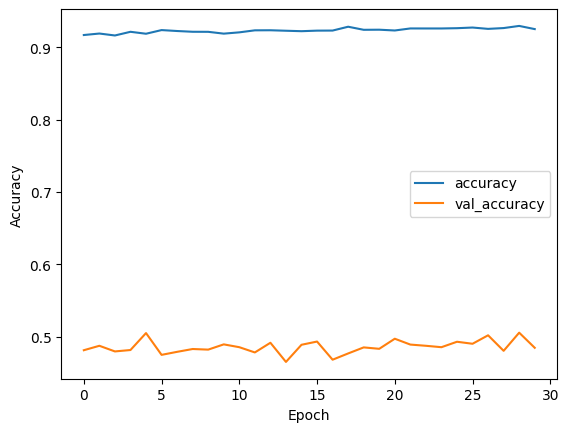

In [23]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label = "accuracy")

# Plot the the validation accuracy
plt.plot(results.history['val_accuracy'], label = "val_accuracy")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Put legend table
plt.legend()

# Show the plot
plt.show()

1/1 [==============================] - 0s 79ms/step


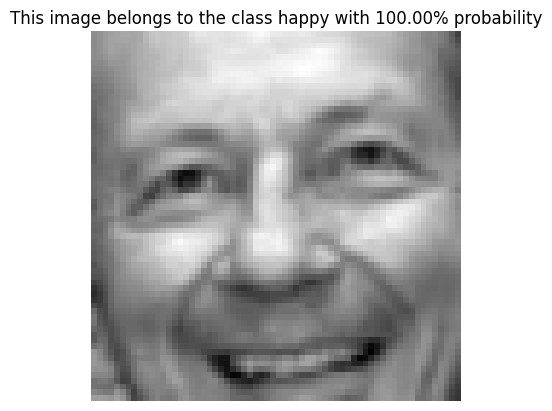

1/1 [==============================] - 0s 21ms/step


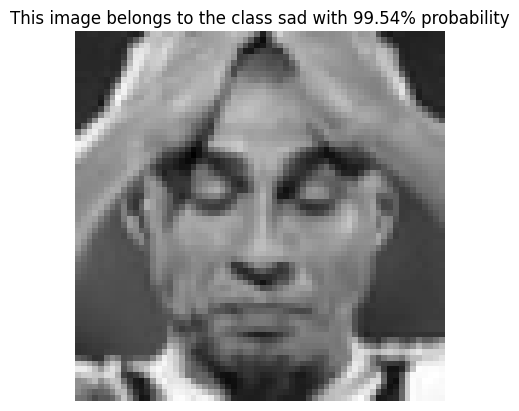

1/1 [==============================] - 0s 24ms/step


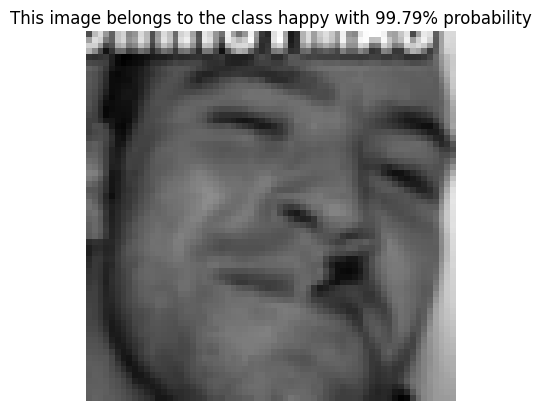

1/1 [==============================] - 0s 20ms/step


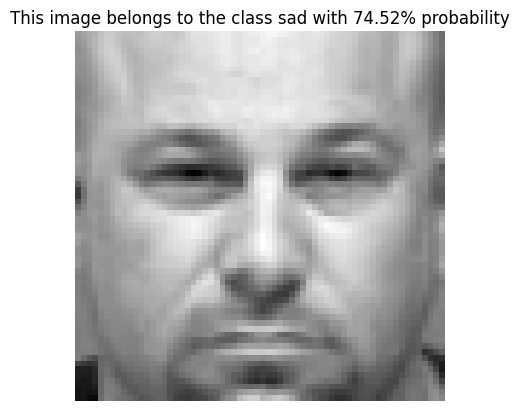

1/1 [==============================] - 0s 19ms/step


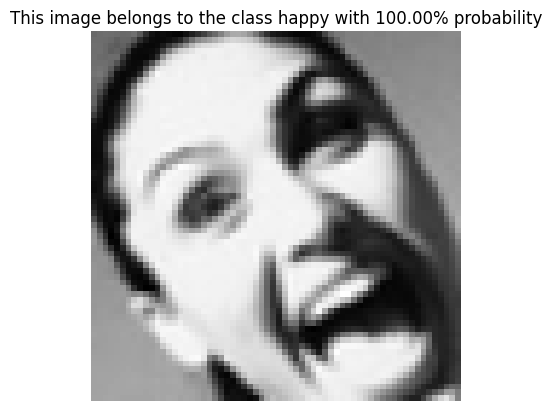

In [24]:
import random

number_of_random_images = 5
random_indices = random.sample(range(len(X_test)), number_of_random_images)

emotion_classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

for idx in random_indices:
    image_to_predict = X_test[idx].reshape(1, 64, 64, 1)
    prediction_result = model.predict(image_to_predict)

    predicted_class = prediction_result.argmax()
    predicted_probability = prediction_result.max()
    predicted_emotion = emotion_classes[predicted_class]

    image_to_show = X_test[idx].reshape(64, 64)
    plt.imshow(image_to_show, cmap='gray')
    plt.title(f"This image belongs to the class {predicted_emotion} with {predicted_probability*100:.2f}% probability")
    plt.axis('off')  # Hide axes
    plt.show()